# MAF To Variant Classification Example
This notebook tests the `read_maf` method from the `pyMut.input` module that generates a `PyMutation` object.
The `read_maf` function now includes automatic caching functionality for improved performance.

In [1]:
# Path to MAF file
maf_path = "../../../src/pyMut/data/examples/MAF/tcga_laml.maf.gz"
print(f'📂 Loading file: {maf_path}')

📂 Cargando archivo: ../../../src/pyMut/data/examples/MAF/tcga_laml.maf.gz


In [2]:
from pyMut.input import read_maf
import time

# Read the MAF file and generate the PyMutation object
print("First read (will create cache)...")
start_time = time.time()
py_mutation = read_maf(maf_path, assembly="37")
first_read_time = time.time() - start_time
print(f"First read completed in {first_read_time:.3f} seconds")

# Show the resulting object
print(py_mutation)

2025-08-01 00:57:10,611 | INFO | pyMut.input | Starting MAF reading: ../../../src/pyMut/data/examples/MAF/tcga_laml.maf.gz
2025-08-01 00:57:10,611 | INFO | pyMut.input | Loading from cache: ../../../src/pyMut/data/examples/MAF/.pymut_cache/tcga_laml.maf_8bfbda65c4b23428.parquet


Primera lectura (creará cache)...


2025-08-01 00:57:10,651 | INFO | pyMut.input | Cache loaded successfully in 0.04 seconds


Primera lectura completada en 0.041 segundos


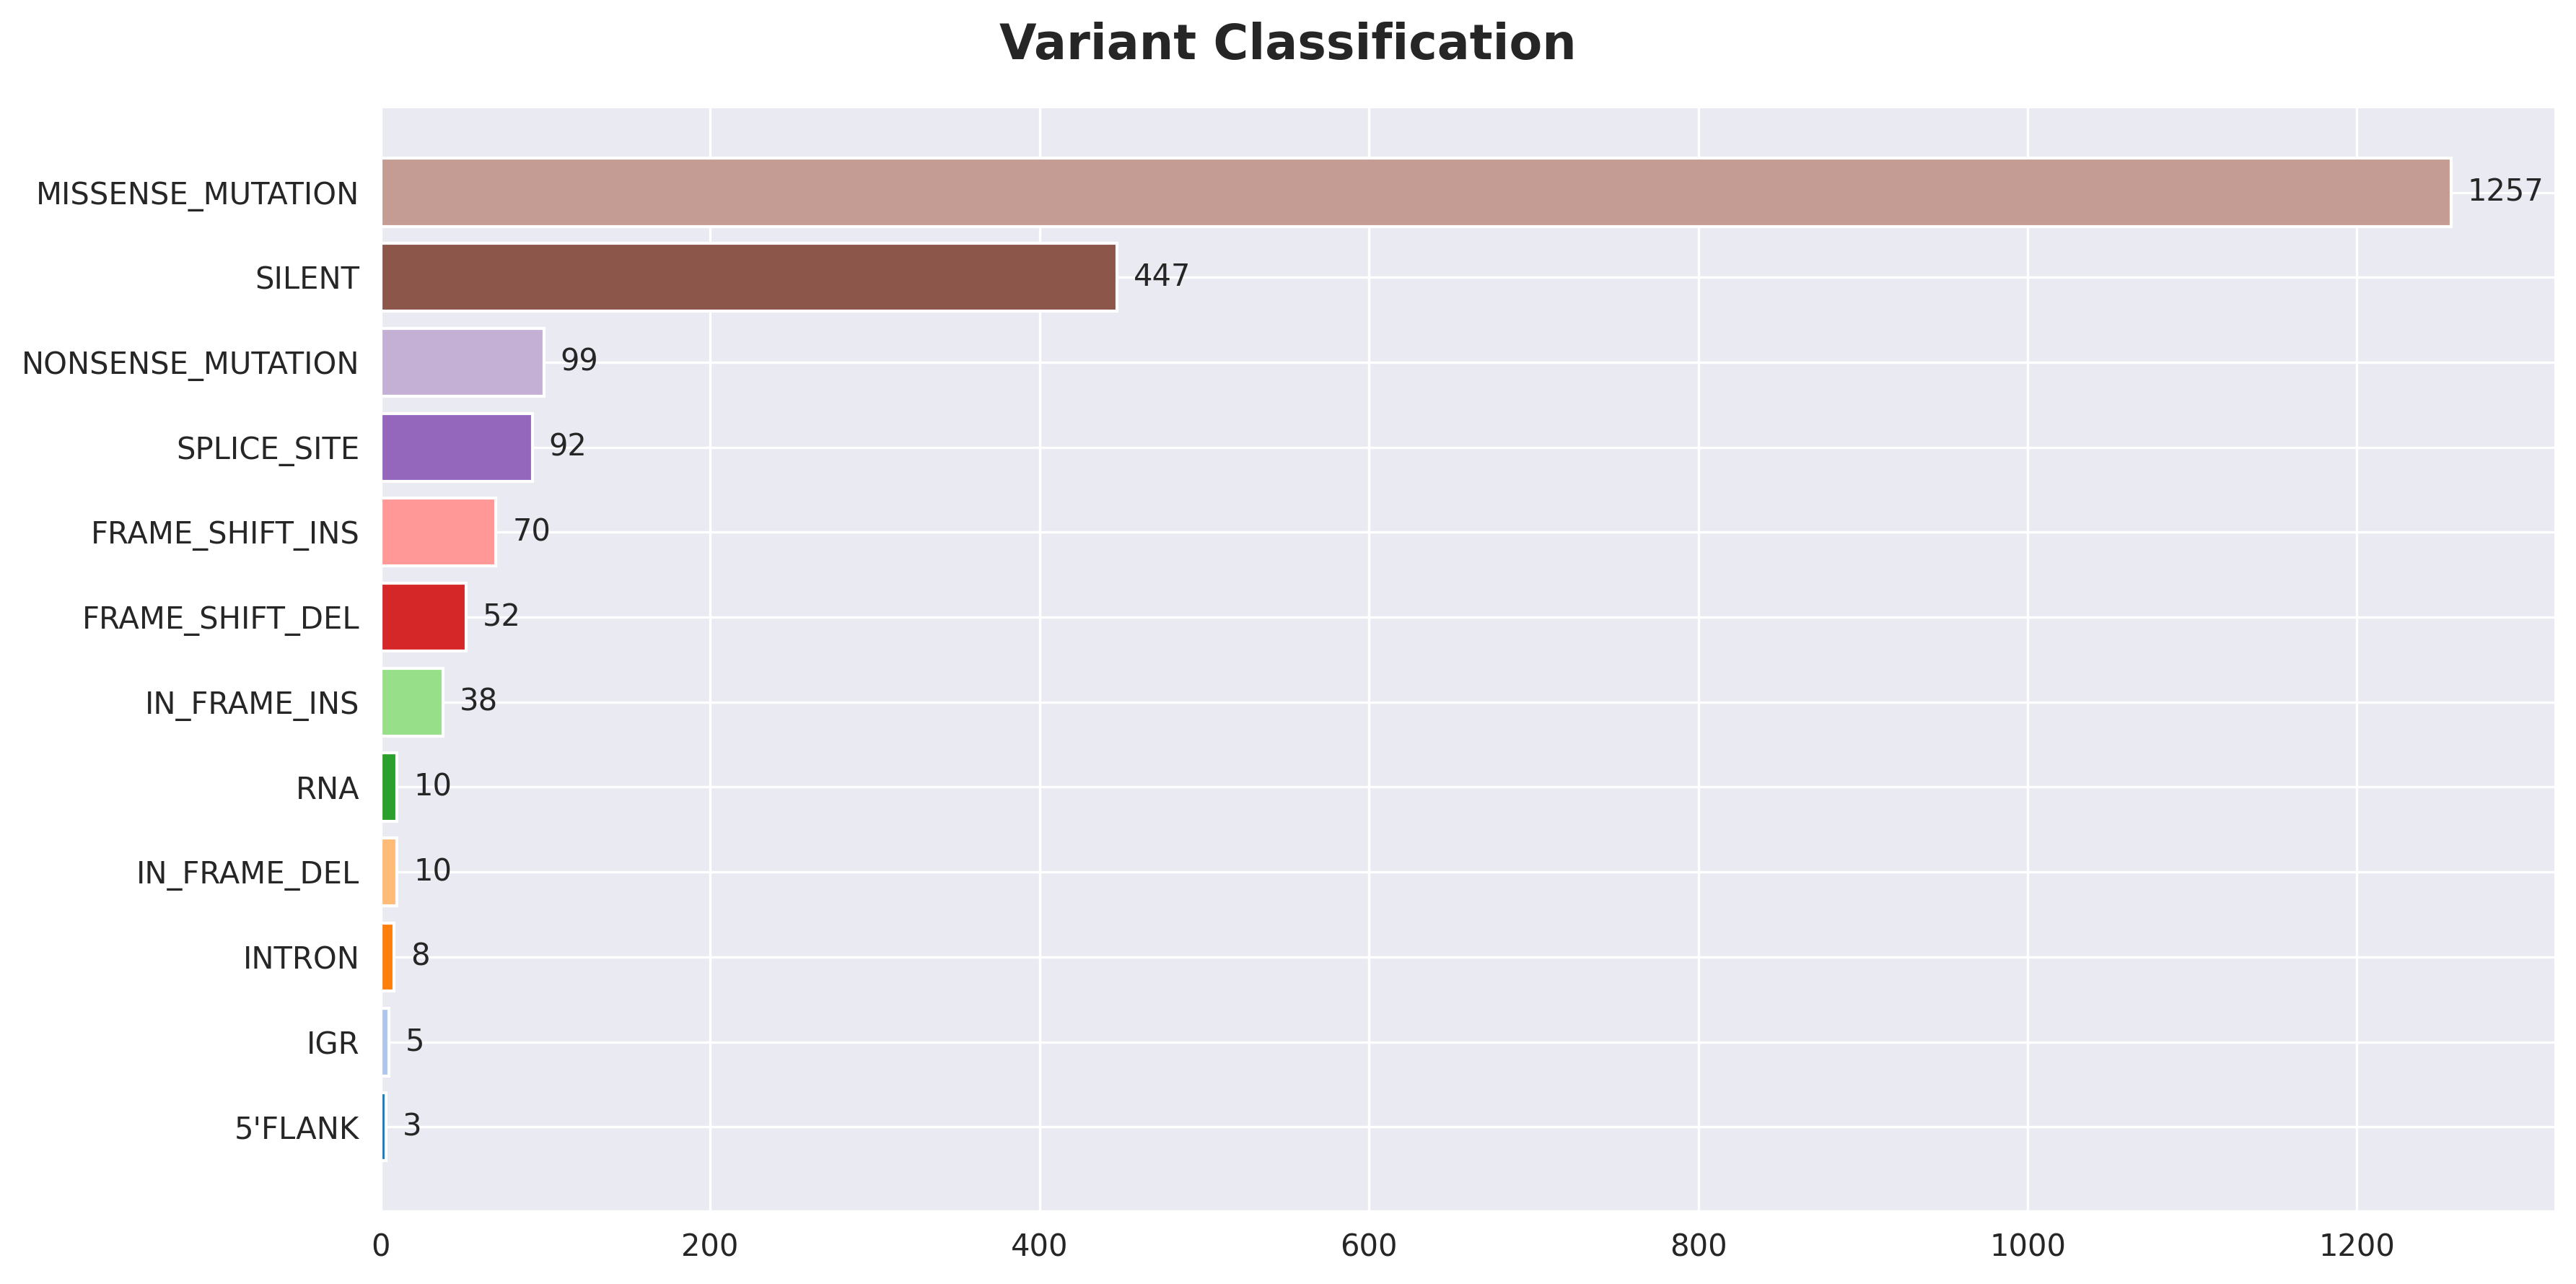

In [3]:
py_mutation.configure_high_quality_plots()

py_mutation.variant_classification_plot()

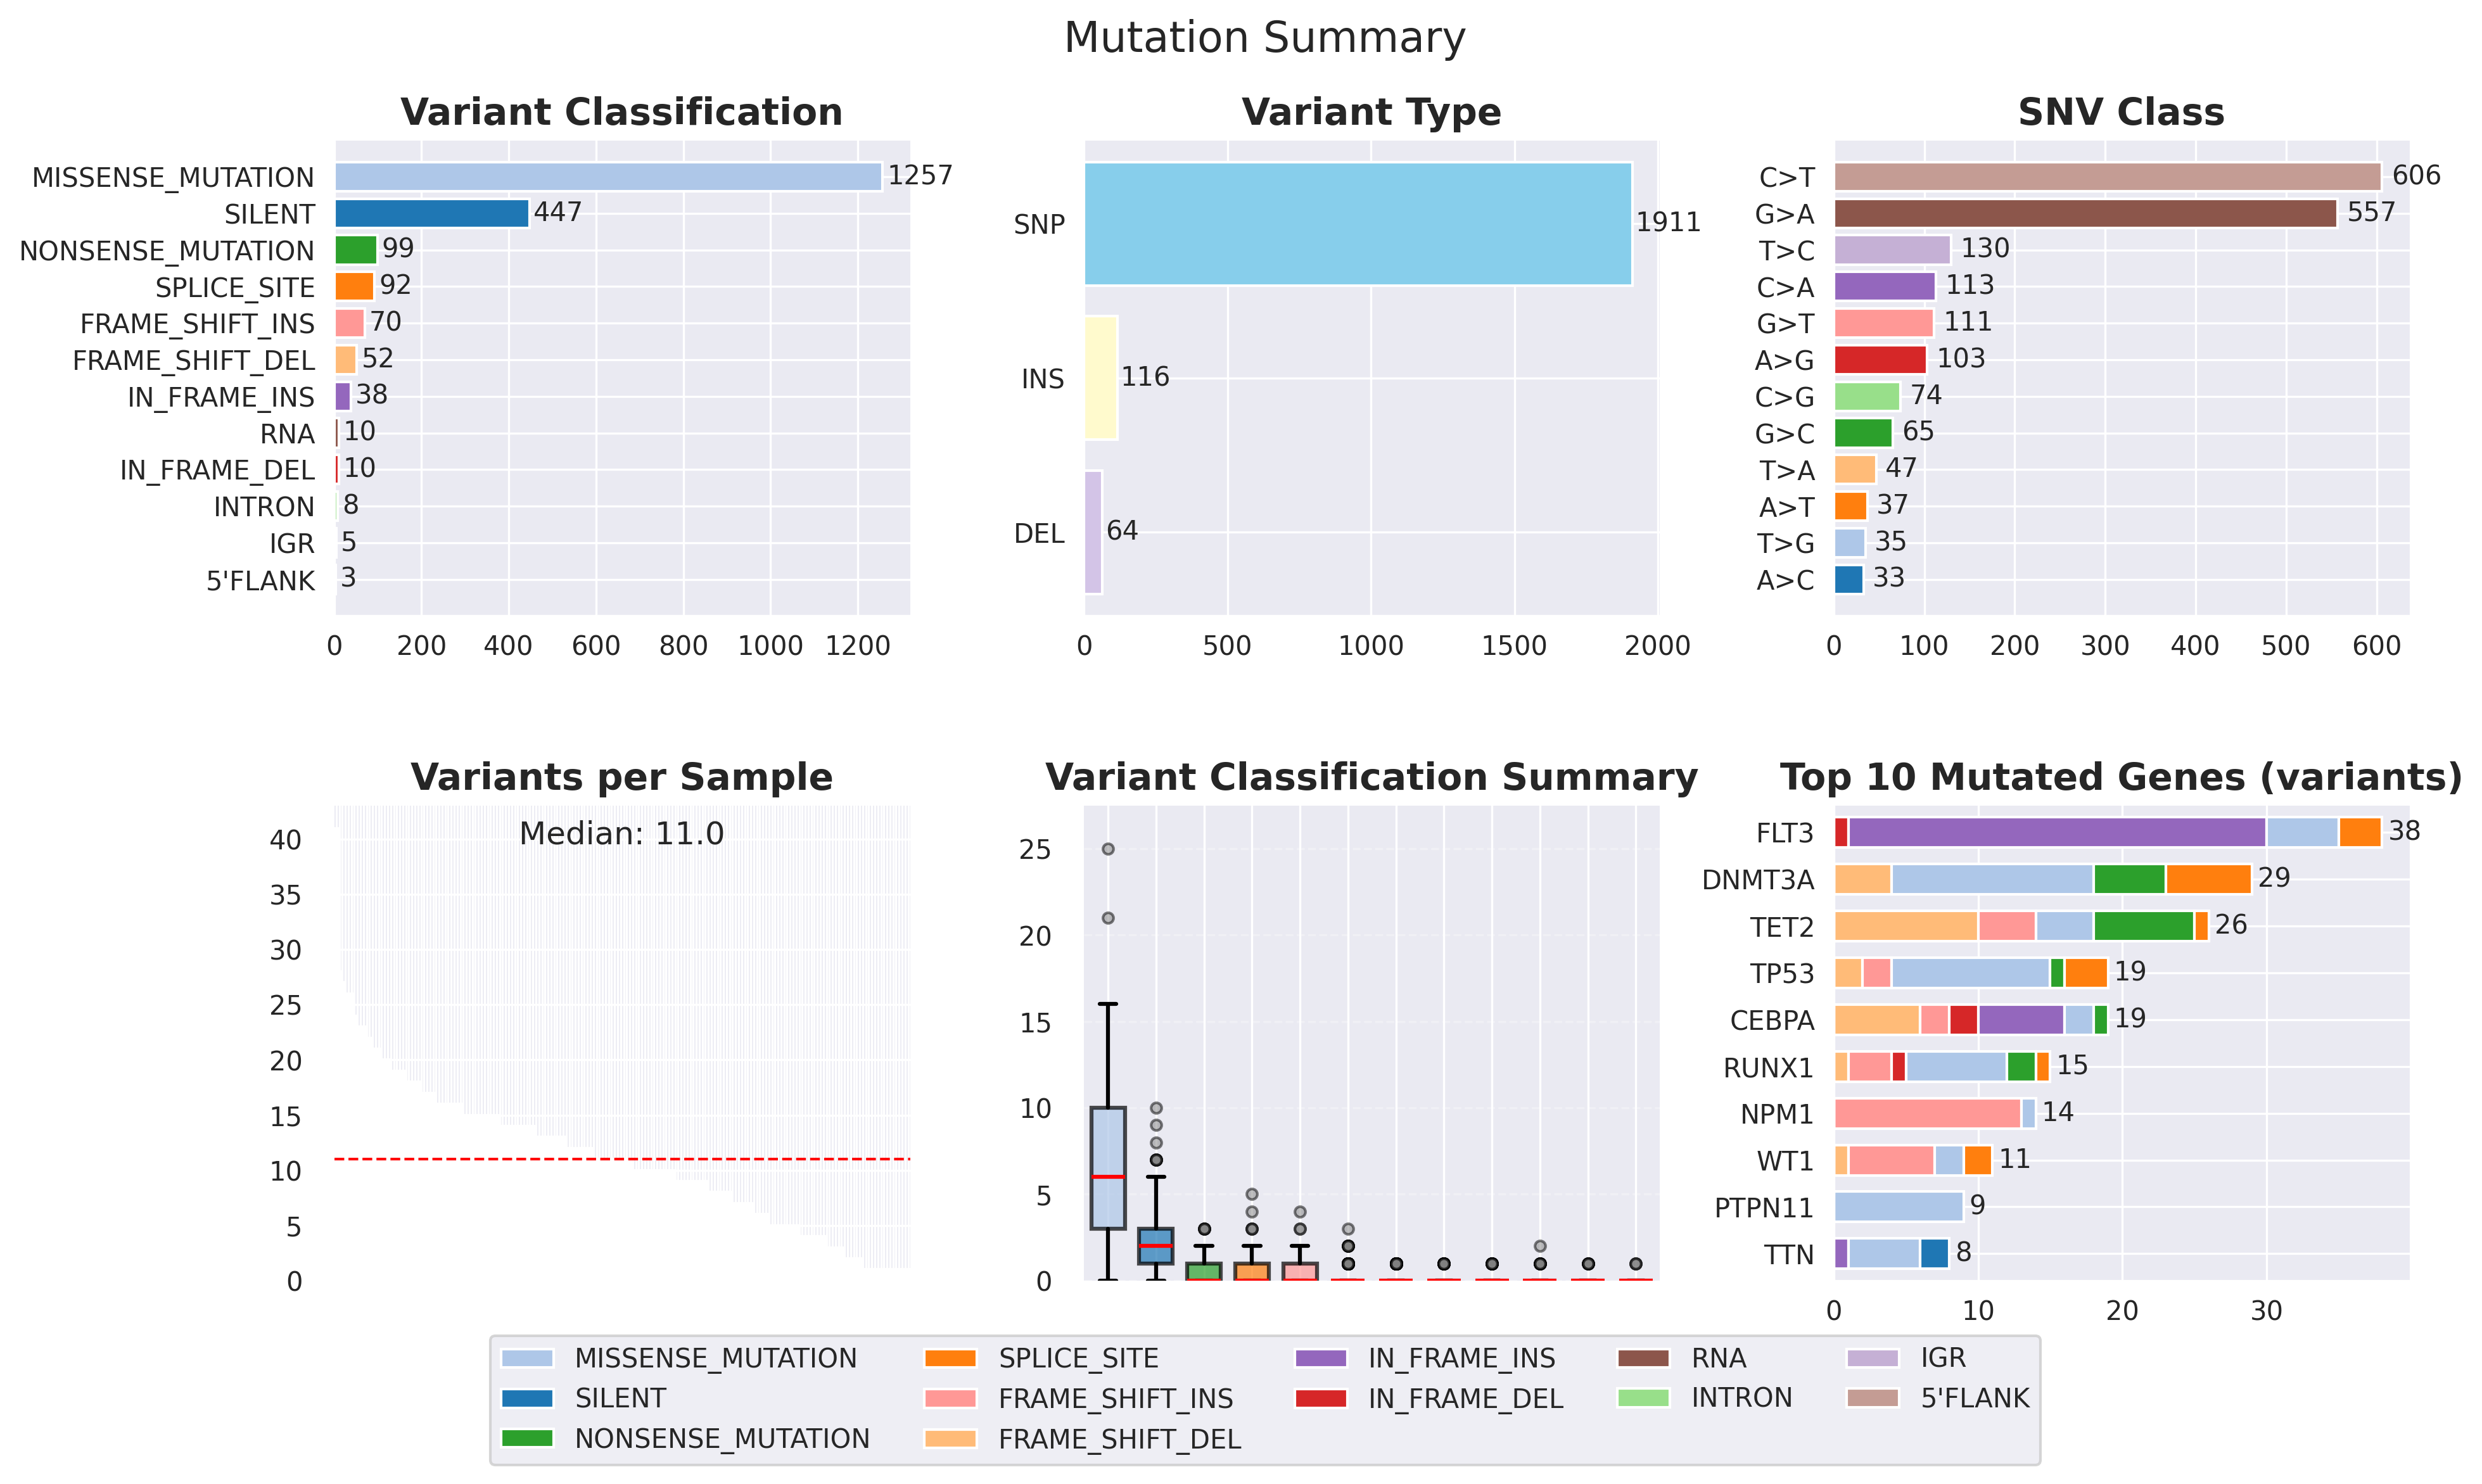

In [4]:
# py_mutation.configure_high_quality_plots()
py_mutation.summary_plot()

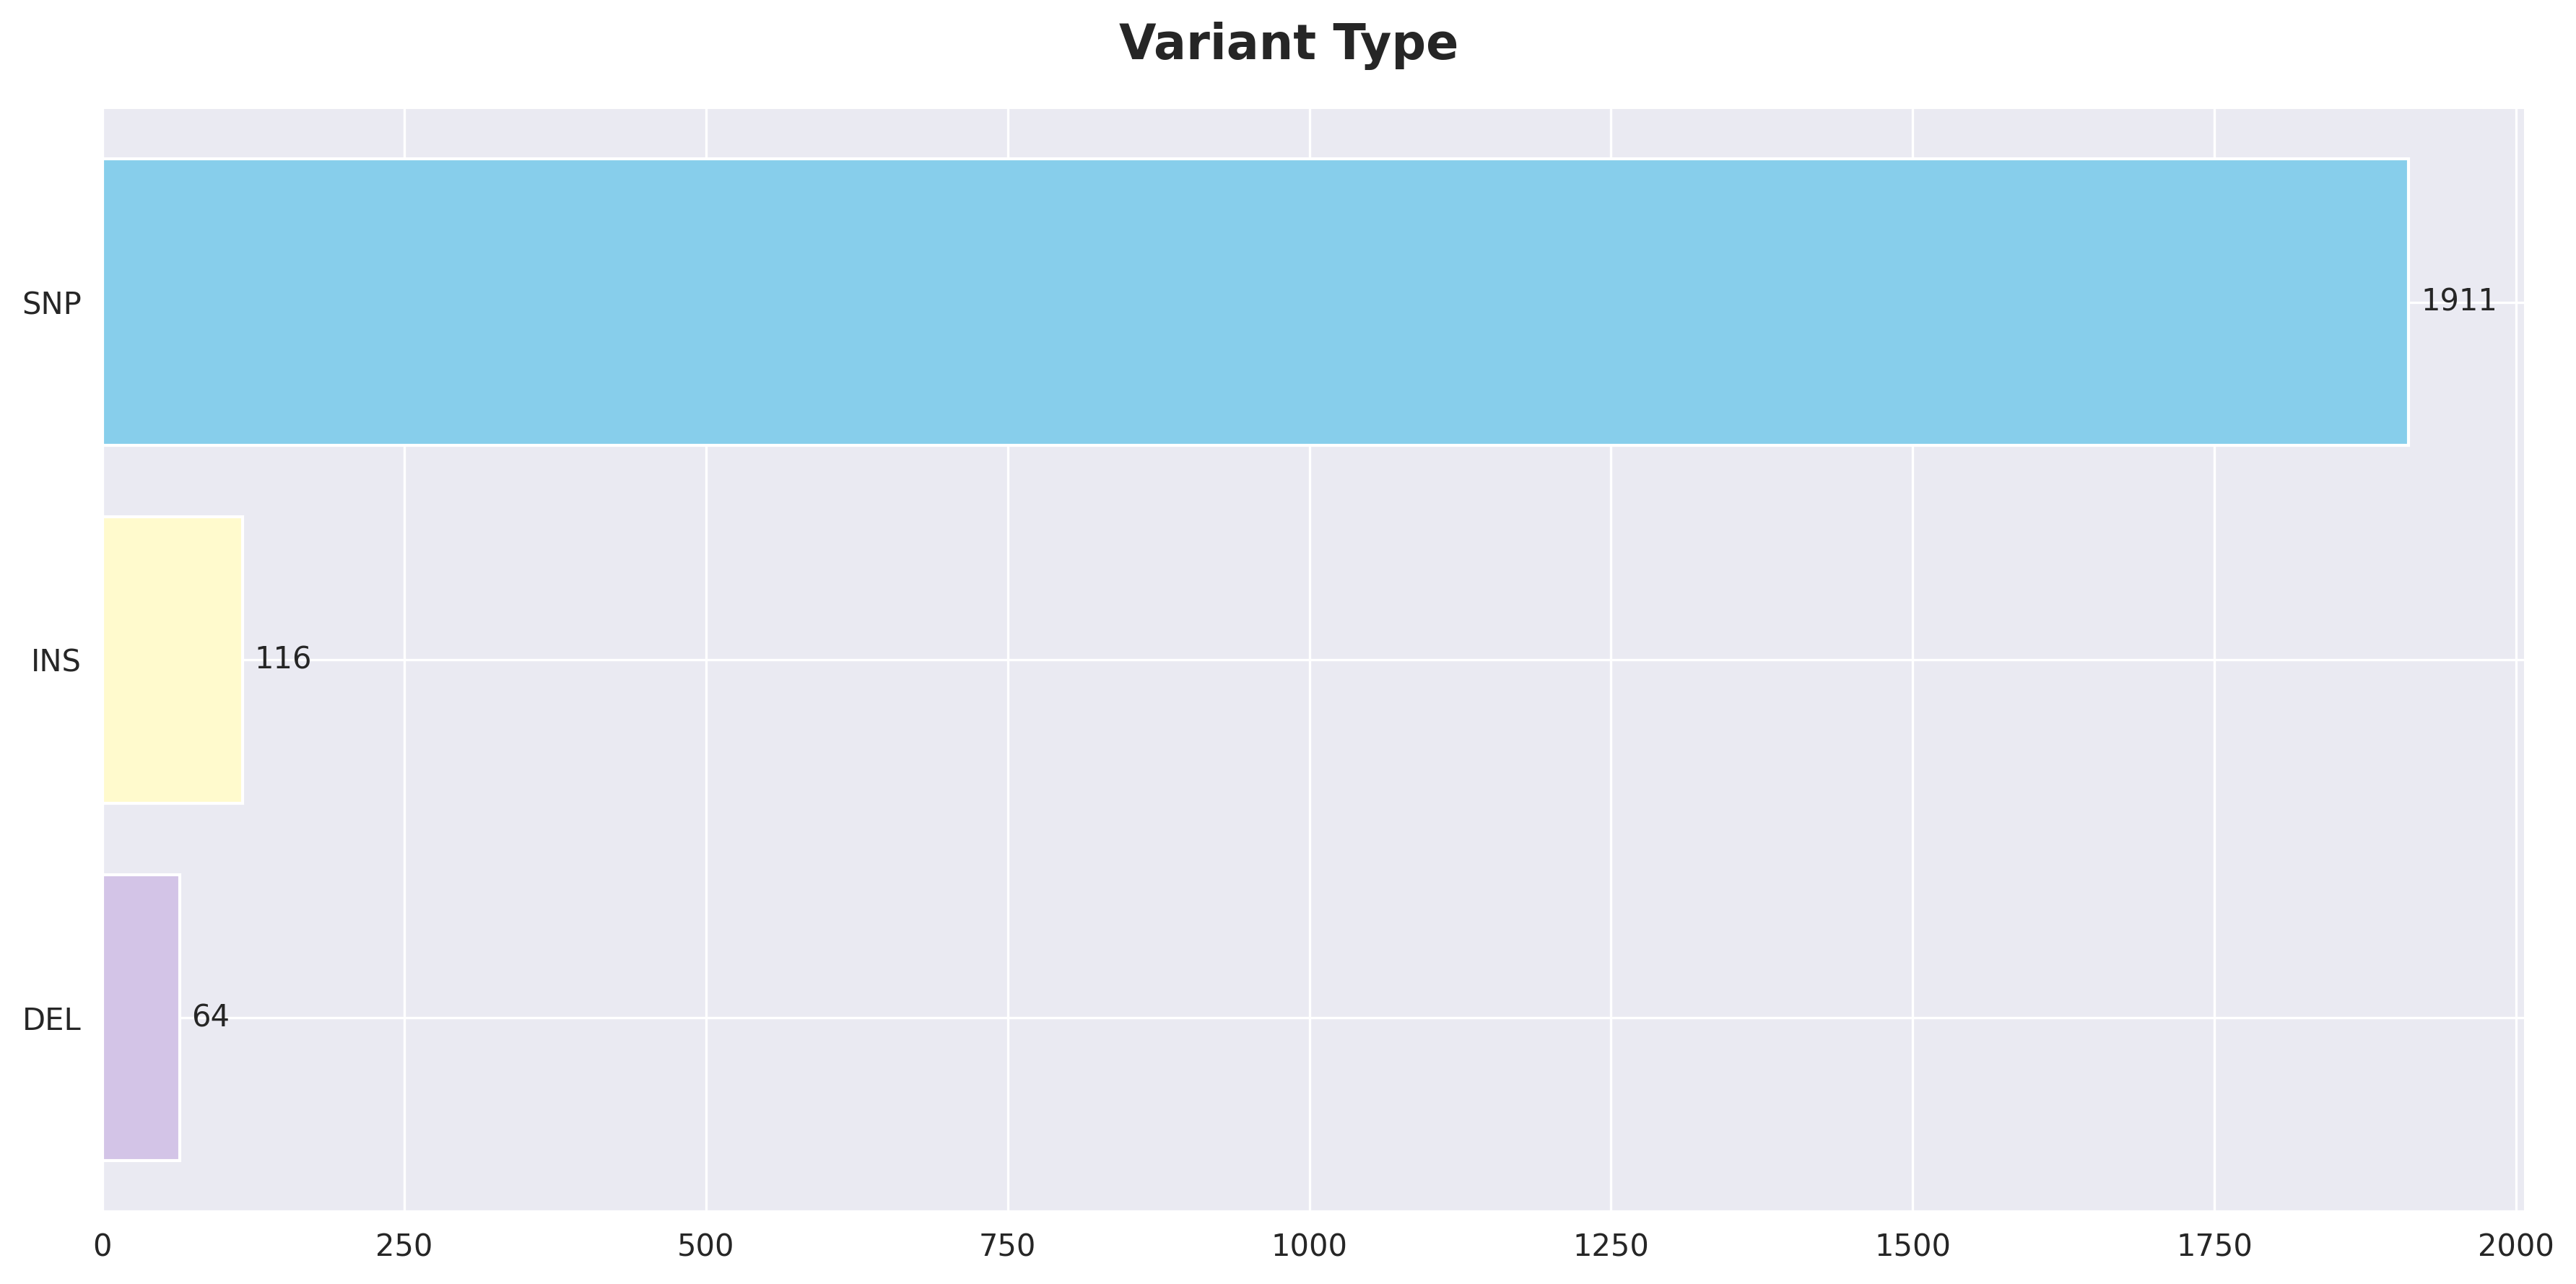

In [5]:
# py_mutation.configure_high_quality_plots()
py_mutation.variant_type_plot()